In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetic_data.csv")
df["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Text(0.5, 1.0, 'Outcomes in Original Data')

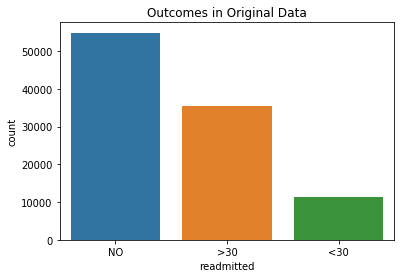

In [2]:
# Original Counts
sns.countplot(df["readmitted"]).set_title("Outcomes in Original Data")

Text(0.5, 1.0, 'Admission frequency')

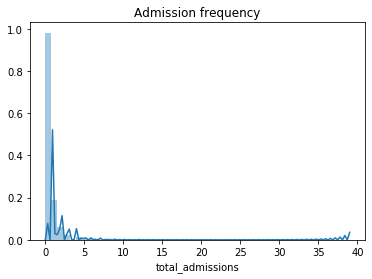

In [3]:
df['total_admissions'] = df.groupby('patient_nbr').cumcount()
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'last')
sns.distplot(df2["total_admissions"]).set_title("Admission frequency")

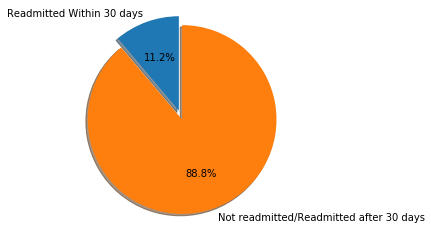

In [22]:
# After dropping the rows to make them i.i.d
df['within30'] = np.where(df['readmitted']=='<30',1,0)
labels = ['Readmitted Within 30 days','Not readmitted/Readmitted after 30 days']
sizes = [df.within30.sum(),df.within30.count()-df.within30.sum()]
explode = (0.1,0)

def drawpie(sizes, labels, explode):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

drawpie(sizes,labels,explode)
plt.show()

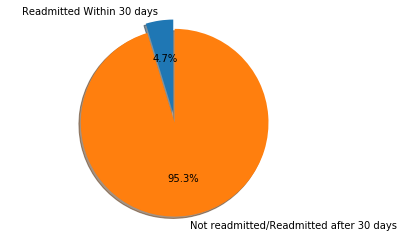

In [23]:
# After data cleaning and data wrangling
df2 = pd.read_csv("Clean_Data.csv")
sizes = [df2.within30.sum(),df2.within30.count()-df2.within30.sum()]
drawpie(sizes,labels,explode)
plt.show()

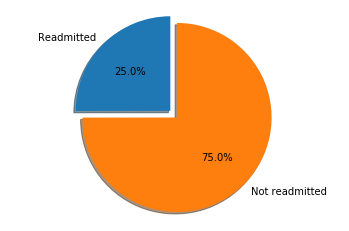

In [25]:
sizes = [df2.readmitted.sum(),df2.readmitted.count()-df2.readmitted.sum()]
labels = ['Readmitted','Not readmitted']
drawpie(sizes,labels,explode)
plt.show()

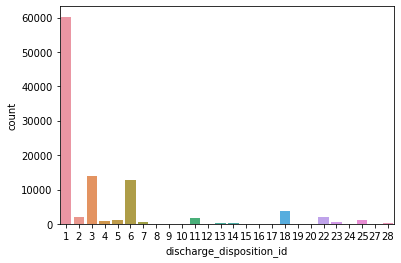

In [24]:
sns.countplot(df["discharge_disposition_id"])